<a href="https://colab.research.google.com/github/Gkemhcs/deeplearning-pytorch-notebooks/blob/main/cnn_3_segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Semantic Segmentation


In [ ]:
from torchvision.models.segmentation import (
    fcn_resnet50,
    deeplabv3_resnet50
)

In [ ]:
! pip install transformers ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.7 MB/s eta 0:00:00


In [ ]:
! curl -o traffic.jpg "https://th-thumbnailer.cdn-si-edu.com/mUMIJ9kZ92F0kh5QNi9QfXmPCH4=/1072x720/filters:no_upscale():focal(2016x1517:2017x1518)/https://tf-cmsv2-smithsonianmag-media.s3.amazonaws.com/filer_public/8f/89/8f89c8d0-4584-47c7-b6a0-5dd1b5bb79e0/img_5913.jpeg"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  187k  100  187k    0     0   388k      0 --:--:-- --:--:-- --:--:--  388k


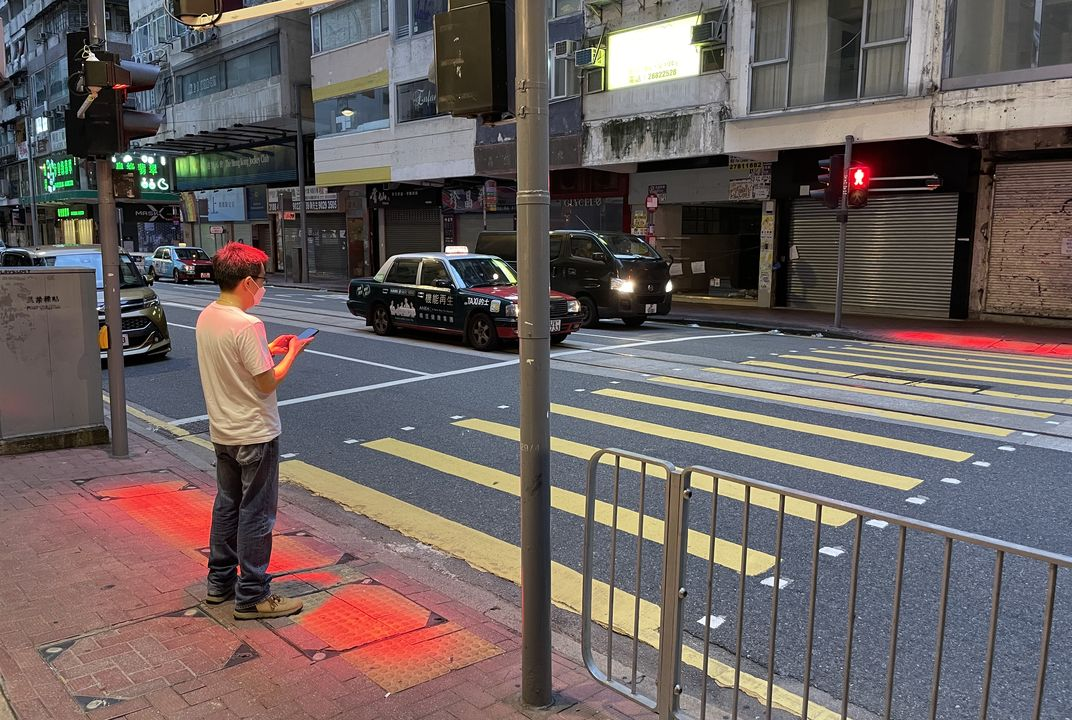

In [ ]:
from PIL import Image
Image.open("traffic.jpg")

In [ ]:
import torch
from torchvision.models.segmentation import deeplabv3_resnet50
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
from PIL import Image

model = deeplabv3_resnet50(pretrained=True)
model.eval()

transform = Compose([
    Resize((520, 520)),
    ToTensor(),
    Normalize(mean=[0.485,0.456,0.406],
              std=[0.229,0.224,0.225])
])

img = Image.open("traffic.jpg")
x = transform(img).unsqueeze(0)

with torch.no_grad():
    out = model(x)["out"]

pred = out.argmax(1)  # (1, H, W)


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DeepLabV3_ResNet50_Weights.COCO_WITH_VOC_LABELS_V1`. You can also use `weights=DeepLabV3_ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Downloading: "https://download.pytorch.org/models/deeplabv3_resnet50_coco-cd0a2569.pth" to /root/.cache/torch/hub/checkpoints/deeplabv3_resnet50_coco-cd0a2569.pth


100%|██████████| 161M/161M [00:01<00:00, 151MB/s]


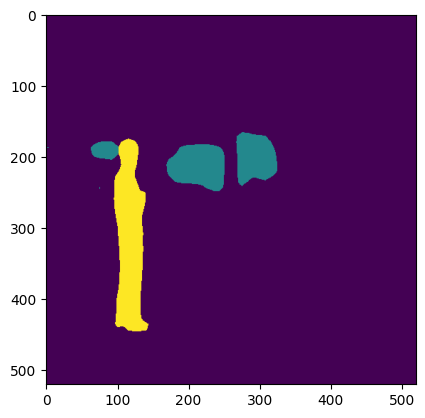

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(pred.permute(1,2,0))

In [ ]:
with torch.no_grad():
    out = model(x)

In [ ]:
out

OrderedDict([('out',
              tensor([[[[10.1065, 10.1065, 10.1065,  ...,  9.6542,  9.6542,  9.6542],
                        [10.1065, 10.1065, 10.1065,  ...,  9.6542,  9.6542,  9.6542],
                        [10.1065, 10.1065, 10.1065,  ...,  9.6542,  9.6542,  9.6542],
                        ...,
                        [ 9.6999,  9.6999,  9.6999,  ...,  9.9349,  9.9349,  9.9349],
                        [ 9.6999,  9.6999,  9.6999,  ...,  9.9349,  9.9349,  9.9349],
                        [ 9.6999,  9.6999,  9.6999,  ...,  9.9349,  9.9349,  9.9349]],
              
                       [[-0.7485, -0.7485, -0.7485,  ..., -0.7357, -0.7357, -0.7357],
                        [-0.7485, -0.7485, -0.7485,  ..., -0.7357, -0.7357, -0.7357],
                        [-0.7485, -0.7485, -0.7485,  ..., -0.7357, -0.7357, -0.7357],
                        ...,
                        [-1.1045, -1.1045, -1.1045,  ..., -1.3086, -1.3086, -1.3086],
                        [-1.1045, -1.1045, -1

# Instance Segmentation

In [ ]:
from torchvision.models.detection import maskrcnn_resnet50_fpn

In [ ]:
%pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.2 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO

model = YOLO("yolo11n-seg.pt")

results = model.predict("traffic.jpg", save=True)

masks = results[0].masks.data   # (N, H, W)
boxes = results[0].boxes.xyxy
classes = results[0].boxes.cls



image 1/1 /content/traffic.jpg: 448x640 1 person, 11 cars, 4 traffic lights, 278.6ms
Speed: 12.5ms preprocess, 278.6ms inference, 48.1ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/segment/predict


In [ ]:
! curl -o scene.jpg "https://news.mit.edu/sites/default/files/styles/news_article__image_gallery/public/images/201908/MIT-Hazard-Reaction-01_0.jpg?itok=mVyq6Pos"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  274k  100  274k    0     0   683k      0 --:--:-- --:--:-- --:--:--  685k


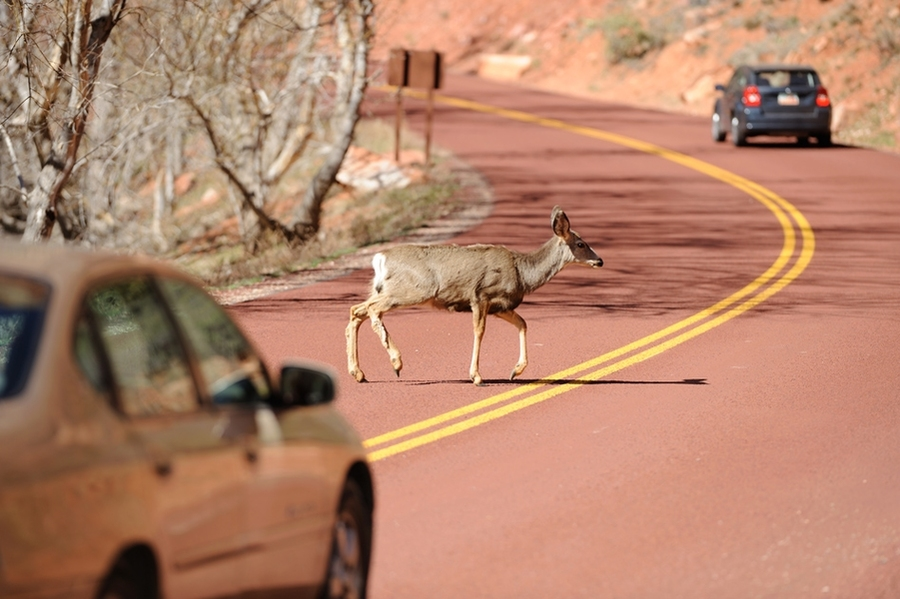

In [ ]:
scene_img=Image.open("scene.jpg")
scene_img

In [ ]:
results=model(scene_img)


0: 448x640 2 cars, 1 dog, 330.2ms
Speed: 6.5ms preprocess, 330.2ms inference, 34.5ms postprocess per image at shape (1, 3, 448, 640)


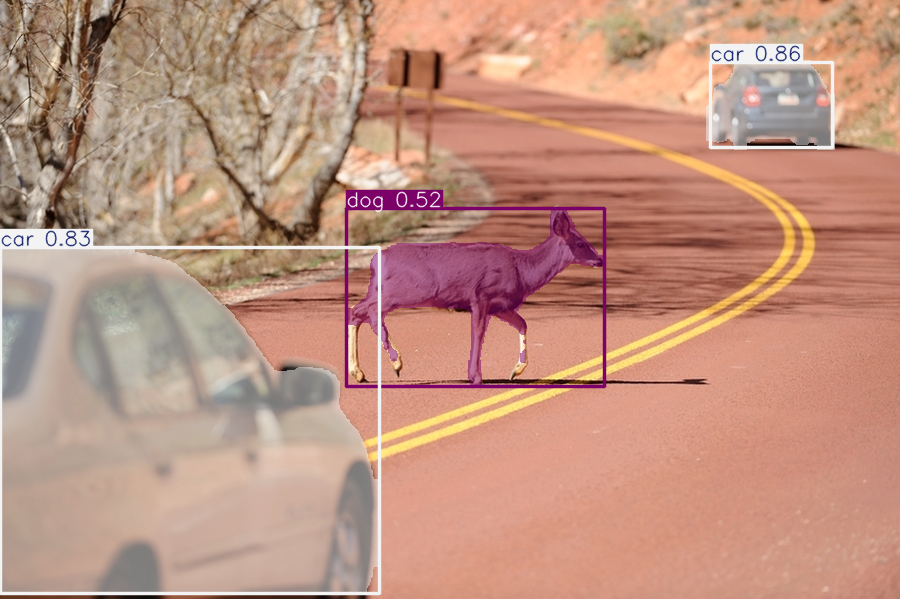

In [ ]:
results[0].show()

In [ ]:
! curl -o cars.jpg "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQJOTVqRO2BKy_PyIGNMYxGU0vU0FZh9upckg&s"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 11754  100 11754    0     0  28427      0 --:--:-- --:--:-- --:--:-- 29094


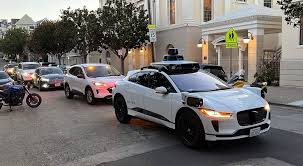

In [ ]:
cars_img=Image.open("cars.jpg")
cars_img

In [ ]:
results=model(cars_img)


0: 352x640 5 cars, 1 motorcycle, 199.9ms
Speed: 2.5ms preprocess, 199.9ms inference, 9.1ms postprocess per image at shape (1, 3, 352, 640)


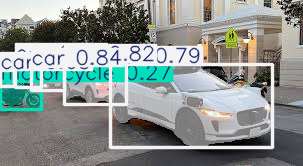

In [ ]:
results[0].show()

# SAM model

In [ ]:
from ultralytics import SAM

# Load a model
model = SAM("sam_b.pt")

# Display model information (optional)
model.info()



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Model summary: 178 layers, 93,735,472 parameters, 93,735,472 gradients


(178, 93735472, 93735472, 0.0)

In [ ]:
model

SAM(
  (model): SAMModel(
    (image_encoder): ImageEncoderViT(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (blocks): ModuleList(
        (0-11): 12 x Block(
          (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (attn): REAttention(
            (qkv): Linear(in_features=768, out_features=2304, bias=True)
            (proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
          (mlp): MLPBlock(
            (lin1): Linear(in_features=768, out_features=3072, bias=True)
            (lin2): Linear(in_features=3072, out_features=768, bias=True)
            (act): GELU(approximate='none')
          )
        )
      )
      (neck): Sequential(
        (0): Conv2d(768, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (1): LayerNorm2d()
        (2): Conv2d(256, 256, kernel_size=(3, 3), strid

In [ ]:

# Run inference with bboxes prompt
results = model("cars.jpg")



image 1/1 /content/cars.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 586616.6ms
Speed: 18.4ms preprocess, 586616.6ms inference, 28.7ms postprocess per image at shape (1, 3, 1024, 1024)


In [ ]:
! curl -o cars.jpg "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRdIsg7tzp397NLq92Ci8QAvGHo53fq-7xypw&s"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  7651  100  7651    0     0   145k      0 --:--:-- --:--:-- --:--:--  146k


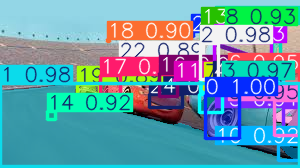

In [ ]:
results[0].show()